In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('final_combined_dataset.csv')

In [3]:
xfeatures=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.x',
       'traveltime.x', 'studytime.x', 'failures.x', 'schoolsup.x', 'famsup.x',
       'paid.x', 'activities.x', 'higher.x', 'romantic.x', 'famrel.x',
       'freetime.x', 'goout.x', 'Dalc.x', 'Walc.x', 'health.x', 'absences.x','G1.x','G3.x']

In [4]:
yfeatures = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'nursery', 'internet','guardian.y', 'traveltime.y', 'studytime.y',
       'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y',
       'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y',
       'Walc.y', 'health.y', 'absences.y','G1.y','G3.y']

In [5]:
keepcol = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.x',
       'traveltime.x', 'studytime.x', 'failures.x', 'schoolsup.x', 'famsup.x',
       'paid.x', 'activities.x', 'higher.x', 'romantic.x', 'famrel.x',
       'freetime.x', 'goout.x', 'Dalc.x', 'Walc.x', 'health.x', 'absences.x',
       'G1.x', 'G2.x', 'G3.x', 'guardian.y', 'traveltime.y', 'studytime.y',
       'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y',
       'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y',
       'Walc.y', 'health.y', 'absences.y', 'G1.y', 'G2.y', 'G3.y']

In [6]:
fildf = df.loc[:,keepcol]

In [7]:
fildf_x = fildf.loc[:,xfeatures]

In [8]:
fildf_y = fildf.loc[:,yfeatures]

In [9]:
def convertmarks(mark):
    if mark<10:
        return 'F'
    elif mark==10 or mark==11:
        return 'D'
    elif mark==12 or mark==13:
        return 'C'
    elif mark==14 or mark==15:
        return'B'
    else:
        return 'A'

In [10]:
newlist=[]
for i in fildf_x['G1.x']:
    x = convertmarks(i)
    newlist.append(x)
fildf_x['New G1'] = newlist

In [11]:
newlist=[]
for i in fildf_y['G1.y']:
    x = convertmarks(i)
    newlist.append(x)
fildf_y['New G1'] = newlist

In [12]:
newlist=[]
for i in fildf_x['G3.x']:
    x = convertmarks(i)
    newlist.append(x)
fildf_x['New G3'] = newlist

In [13]:
newlist=[]
for i in fildf_y['G3.y']:
    x = convertmarks(i)
    newlist.append(x)
fildf_y['New G3'] = newlist

In [14]:
label_encoder = preprocessing.LabelEncoder()

In [15]:
fildf_x['New G1']= label_encoder.fit_transform(fildf_x['New G1'])
fildf_y['New G1']= label_encoder.fit_transform(fildf_y['New G1'])
fildf_x['New G3']= label_encoder.fit_transform(fildf_x['New G3'])
fildf_y['New G3']= label_encoder.fit_transform(fildf_y['New G3'])

In [16]:
fildf_x = fildf_x.sample(frac=1,random_state=123)
fildf_y = fildf_y.sample(frac=1,random_state=123)

In [17]:
fildf_x['New G1'].value_counts()

2    413
4    217
3    161
1     49
0     42
Name: New G1, dtype: int64

In [18]:
fildf_x['New G3'].value_counts()

2    406
4    276
3     99
1     59
0     42
Name: New G3, dtype: int64

In [19]:
max_size = fildf_x['New G1'].value_counts().max()

In [20]:
lst = [fildf_x]
for class_index, group in fildf_x.groupby('New G1'):
    lst.append(group.sample(max_size-len(group), replace=True))
fildf_x_G1 = pd.concat(lst)

In [21]:
fildf_x_G1['New G1'].value_counts()

3    413
1    413
4    413
2    413
0    413
Name: New G1, dtype: int64

In [22]:
max_size = fildf_y['New G1'].value_counts().max()

In [23]:
lst = [fildf_y]
for class_index, group in fildf_y.groupby('New G1'):
    lst.append(group.sample(max_size-len(group), replace=True))
fildf_y_G1 = pd.concat(lst)

In [24]:
fildf_y_G1['New G1'].value_counts()

3    439
1    439
4    439
2    439
0    439
Name: New G1, dtype: int64

In [25]:
max_size = fildf_x['New G3'].value_counts().max()

In [26]:
lst = [fildf_x]
for class_index, group in fildf_x.groupby('New G3'):
    lst.append(group.sample(max_size-len(group), replace=True))
fildf_x_G3 = pd.concat(lst)

In [27]:
fildf_x_G3['New G3'].value_counts()

4    406
3    406
2    406
1    406
0    406
Name: New G3, dtype: int64

In [28]:
max_size = fildf_y['New G3'].value_counts().max()

In [29]:
lst = [fildf_y]
for class_index, group in fildf_y.groupby('New G3'):
    lst.append(group.sample(max_size-len(group), replace=True))
fildf_y_G3 = pd.concat(lst)

In [30]:
fildf_y_G3.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.y',
       'traveltime.y', 'studytime.y', 'failures.y', 'schoolsup.y', 'famsup.y',
       'paid.y', 'activities.y', 'higher.y', 'romantic.y', 'famrel.y',
       'freetime.y', 'goout.y', 'Dalc.y', 'Walc.y', 'health.y', 'absences.y',
       'G1.y', 'G3.y', 'New G1', 'New G3'],
      dtype='object')

In [31]:
fildf_x_G1 = fildf_x_G1.drop(['G1.x','G3.x'],axis=1)
fildf_y_G1 = fildf_y_G1.drop(['G1.y','G3.y'],axis=1)
fildf_x_G3 = fildf_x_G3.drop(['G1.x','G3.x'],axis=1)
fildf_y_G3 = fildf_y_G3.drop(['G1.y','G3.y'],axis=1)

In [32]:
features_x_G3 = fildf_x_G3.drop(['New G1','New G3'],axis=1)
features_x_G1 = fildf_x_G1.drop(['New G1','New G3'],axis=1)
features_y_G3 = fildf_y_G3.drop(['New G1','New G3'],axis=1)
features_y_G1 = fildf_y_G1.drop(['New G1','New G3'],axis=1)

In [33]:
target_x_G3 = fildf_x_G3['New G3']
target_x_G1 = fildf_x_G1['New G1']
target_y_G3 = fildf_y_G3['New G3']
target_y_G1 = fildf_y_G1['New G1']

In [34]:
X_train_x_G1, X_test_x_G1, y_train_x_G1, y_test_x_G1 = train_test_split(features_x_G1, target_x_G1, test_size=0.25, random_state=0)
X_train_y_G1, X_test_y_G1, y_train_y_G1, y_test_y_G1 = train_test_split(features_y_G1, target_y_G1, test_size=0.25, random_state=0)

In [35]:
X_train_x_G3, X_test_x_G3, y_train_x_G3, y_test_x_G3 = train_test_split(features_x_G3, target_x_G3, test_size=0.25, random_state=0)
X_train_y_G3, X_test_y_G3, y_train_y_G3, y_test_y_G3 = train_test_split(features_y_G3, target_y_G3, test_size=0.25, random_state=0)

### Naive Bayes

In [36]:
clf = GaussianNB()

In [37]:
clf.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= clf.predict(X_test_x_G1)
y_pred_x_G1_Prob = clf.predict_proba(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.98      0.29      0.44       366
           1       0.00      0.00      0.00         0
           2       0.08      0.50      0.14        20
           3       0.29      0.53      0.38        55
           4       0.49      0.66      0.56        76

    accuracy                           0.38       517
   macro avg       0.37      0.39      0.31       517
weighted avg       0.80      0.38      0.44       517

Kappa Score: 0.21434486003293352


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
clf.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= clf.predict(X_test_x_G3)
y_pred_x_G3_Prob = clf.predict_proba(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.63      0.43      0.51       141
           1       0.78      0.34      0.47       230
           2       0.10      0.32      0.15        34
           3       0.14      0.30      0.19        47
           4       0.40      0.71      0.52        56

    accuracy                           0.40       508
   macro avg       0.41      0.42      0.37       508
weighted avg       0.59      0.40      0.44       508

Kappa Score: 0.25347749206211556


In [39]:
clf.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = clf.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       1.00      0.28      0.43       392
           1       0.02      0.04      0.03        45
           2       0.01      1.00      0.02         1
           3       0.08      0.38      0.13        24
           4       0.57      0.68      0.62        87

    accuracy                           0.33       549
   macro avg       0.34      0.47      0.25       549
weighted avg       0.81      0.33      0.41       549

Kappa Score: 0.16151375805958934


In [40]:
clf.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = clf.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.65      0.34      0.45       156
           1       0.71      0.42      0.53       161
           2       0.13      0.39      0.20        36
           3       0.18      0.50      0.26        40
           4       0.69      0.67      0.68        90

    accuracy                           0.45       483
   macro avg       0.47      0.46      0.42       483
weighted avg       0.60      0.45      0.48       483

Kappa Score: 0.3148029537093402


### Decision Tree Classfier

In [41]:
dtc = DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       121
           1       1.00      0.92      0.96        98
           2       0.52      0.87      0.65        71
           3       0.89      0.77      0.83       114
           4       0.90      0.81      0.86       113

    accuracy                           0.85       517
   macro avg       0.86      0.85      0.85       517
weighted avg       0.89      0.85      0.86       517

Kappa Score: 0.811790293147143
	
Feature failures.x and its importance is 0.09360144864547679
Feature absences.x and its importance is 0.09161086046222061
Feature schoolsup.x and its importance is 0.06778811383144955
Feature Medu and its importance is 0.061603724463396084
Feature Fjob and its importance is 0.060833927988673306
Feature goout.x and its importance is 0.05884696244024378
Feature famrel.x and its importance is 0.05643142485258639
Feature freetime.x and its importance is 0.05228457639106686
Feat

([<matplotlib.axis.XTick at 0x7fc5830c7710>,
 <a list of 30 Text xticklabel objects>)

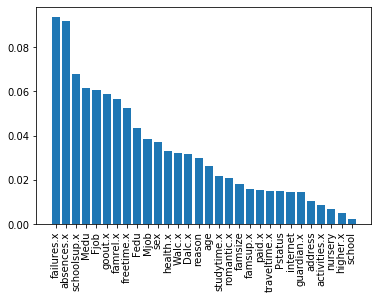

In [42]:
imp_dict={}
dtc.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= dtc.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_x_G1.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       106
           1       1.00      0.87      0.93       115
           2       0.57      0.90      0.70        72
           3       0.95      0.79      0.86       121
           4       0.83      0.87      0.85        94

    accuracy                           0.86       508
   macro avg       0.87      0.87      0.86       508
weighted avg       0.90      0.86      0.87       508

Kappa Score: 0.8256573859242072
	
Feature absences.x and its importance is 0.07813107933895834
Feature goout.x and its importance is 0.07741060456096989
Feature failures.x and its importance is 0.07031546857168523
Feature Walc.x and its importance is 0.06303892627437707
Feature Fjob and its importance is 0.04538287526184237
Feature health.x and its importance is 0.04500623843869325
Feature guardian.x and its importance is 0.04364468978455094
Feature traveltime.x and its importance is 0.04337308300908877
Fe

([<matplotlib.axis.XTick at 0x7fc57df32850>,
 <a list of 30 Text xticklabel objects>)

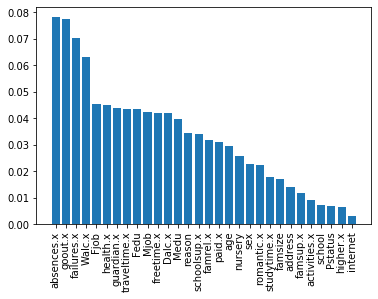

In [43]:
imp_dict={}
dtc.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= dtc.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_x_G3.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       118
           1       0.92      0.86      0.89       118
           2       0.46      0.70      0.55        73
           3       0.81      0.73      0.77       128
           4       1.00      0.92      0.96       112

    accuracy                           0.83       549
   macro avg       0.84      0.82      0.82       549
weighted avg       0.87      0.83      0.84       549

Kappa Score: 0.790524931879544
	
Feature health.y and its importance is 0.06640154236033266
Feature goout.y and its importance is 0.05877630346720427
Feature absences.y and its importance is 0.05688144131031613
Feature freetime.y and its importance is 0.054012676919394535
Feature failures.y and its importance is 0.04841853665738571
Feature studytime.y and its importance is 0.046510309572628784
Feature reason and its importance is 0.04639691085625105
Feature Medu and its importance is 0.0457285413302684
Fea

([<matplotlib.axis.XTick at 0x7fc57df0ff50>,
 <a list of 30 Text xticklabel objects>)

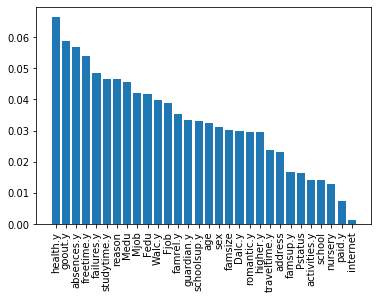

In [44]:
imp_dict={}
dtc.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = dtc.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_y_G1.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        95
           1       0.82      0.76      0.79       104
           2       0.39      0.67      0.49        61
           3       0.81      0.71      0.76       129
           4       1.00      0.93      0.96        94

    accuracy                           0.79       483
   macro avg       0.80      0.79      0.78       483
weighted avg       0.83      0.79      0.80       483

Kappa Score: 0.733139151284981
	
Feature reason and its importance is 0.06403115864239761
Feature absences.y and its importance is 0.06246404762407215
Feature failures.y and its importance is 0.05824307990062725
Feature Fjob and its importance is 0.05533148778420564
Feature health.y and its importance is 0.055176684583548484
Feature Fedu and its importance is 0.04724473087715204
Feature age and its importance is 0.045174573183413794
Feature goout.y and its importance is 0.044959907115008246
Feature guardia

([<matplotlib.axis.XTick at 0x7fc5835dd290>,
 <a list of 30 Text xticklabel objects>)

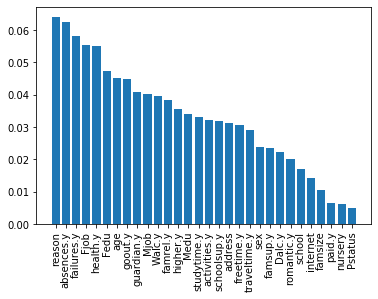

In [45]:
imp_dict={}
dtc.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = dtc.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_y_G3.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

### Random Forest

In [46]:
rf = RandomForestClassifier()

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       109
           1       1.00      0.96      0.98        94
           2       0.92      0.87      0.89       126
           3       0.89      0.96      0.92        92
           4       0.91      0.97      0.94        96

    accuracy                           0.94       517
   macro avg       0.94      0.95      0.94       517
weighted avg       0.94      0.94      0.94       517

Kappa Score: 0.9272759668404666
	
Feature failures.x and its importance is 0.08109364989321349
Feature absences.x and its importance is 0.06639155407162745
Feature schoolsup.x and its importance is 0.049990016440847676
Feature freetime.x and its importance is 0.049545247424846124
Feature Mjob and its importance is 0.049044674287290146
Feature goout.x and its importance is 0.0466994677410887
Feature health.x and its importance is 0.04513936193733848
Feature Medu and its importance is 0.0450889541675277
Feat

([<matplotlib.axis.XTick at 0x7fc5839c4150>,
 <a list of 30 Text xticklabel objects>)

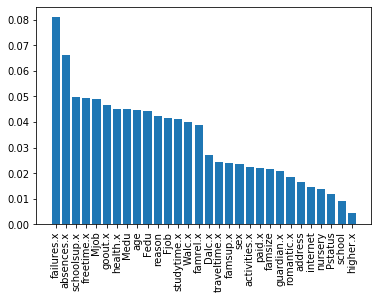

In [47]:
imp_dict={}
rf.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= rf.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_x_G1.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        98
           1       1.00      0.94      0.97       106
           2       0.87      0.88      0.87       113
           3       0.94      0.96      0.95        98
           4       0.87      0.92      0.90        93

    accuracy                           0.93       508
   macro avg       0.94      0.93      0.93       508
weighted avg       0.94      0.93      0.93       508

Kappa Score: 0.9162630596562674
	
Feature absences.x and its importance is 0.0704159332824306
Feature failures.x and its importance is 0.05656398210484769
Feature Mjob and its importance is 0.05522004458393879
Feature goout.x and its importance is 0.051897554164328084
Feature Medu and its importance is 0.04930389672988403
Feature Walc.x and its importance is 0.04836513902079955
Feature health.x and its importance is 0.048285234323200116
Feature reason and its importance is 0.04782258293158195
Feature freet

([<matplotlib.axis.XTick at 0x7fc584341610>,
 <a list of 30 Text xticklabel objects>)

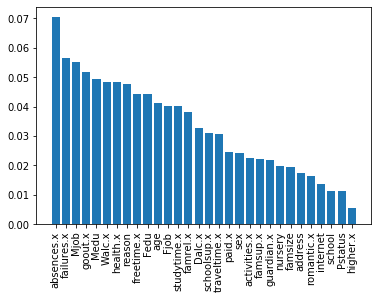

In [48]:
imp_dict={}
rf.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= rf.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_x_G3.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       110
           1       0.92      0.93      0.92       109
           2       0.81      0.77      0.79       118
           3       0.78      0.87      0.82       105
           4       1.00      0.96      0.98       107

    accuracy                           0.90       549
   macro avg       0.90      0.90      0.90       549
weighted avg       0.90      0.90      0.90       549

Kappa Score: 0.8747687815722024
	
Feature absences.y and its importance is 0.058491878077401326
Feature health.y and its importance is 0.05497215622089035
Feature goout.y and its importance is 0.051633235770804566
Feature studytime.y and its importance is 0.051221994778349024
Feature Fedu and its importance is 0.048282094773390585
Feature age and its importance is 0.048278203593314556
Feature Medu and its importance is 0.048273250694073545
Feature freetime.y and its importance is 0.046153757398042936
Featu

([<matplotlib.axis.XTick at 0x7fc583e4fb10>,
 <a list of 30 Text xticklabel objects>)

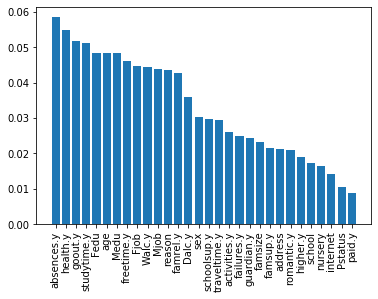

In [49]:
imp_dict={}
rf.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = rf.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_y_G1.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        86
           1       0.78      0.78      0.78        96
           2       0.64      0.65      0.64       105
           3       0.81      0.83      0.82       109
           4       1.00      1.00      1.00        87

    accuracy                           0.83       483
   macro avg       0.85      0.84      0.85       483
weighted avg       0.84      0.83      0.84       483

Kappa Score: 0.7923853122279894
	
Feature goout.y and its importance is 0.0550797968071945
Feature absences.y and its importance is 0.0540875695180548
Feature health.y and its importance is 0.05315908393693916
Feature age and its importance is 0.0501831665601159
Feature Medu and its importance is 0.04860921087952246
Feature studytime.y and its importance is 0.04755817143731535
Feature Mjob and its importance is 0.046667885830792864
Feature freetime.y and its importance is 0.04588976128999653
Feature Fedu a

([<matplotlib.axis.XTick at 0x7fc583fa75d0>,
 <a list of 30 Text xticklabel objects>)

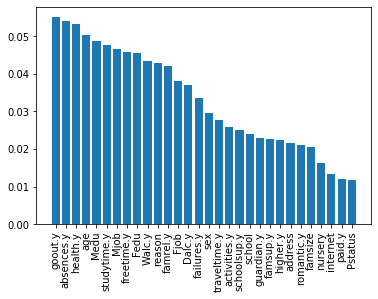

In [50]:
imp_dict={}
rf.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = rf.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_y_G3.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

### Linear SVM

In [51]:
lsvm = LinearSVC(max_iter=1000000)

In [52]:
lsvm.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= lsvm.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.64      0.43      0.52       160
           1       0.67      0.43      0.52       139
           2       0.29      0.43      0.35        82
           3       0.35      0.56      0.43        62
           4       0.52      0.72      0.60        74

    accuracy                           0.49       517
   macro avg       0.50      0.51      0.49       517
weighted avg       0.54      0.49      0.49       517

Kappa Score: 0.3604322759844082


In [53]:
lsvm.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= lsvm.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.53      0.37      0.43       136
           1       0.58      0.47      0.52       123
           2       0.30      0.38      0.33        90
           3       0.23      0.45      0.30        51
           4       0.64      0.58      0.61       108

    accuracy                           0.45       508
   macro avg       0.45      0.45      0.44       508
weighted avg       0.49      0.45      0.46       508

Kappa Score: 0.31215907772060814


In [54]:
lsvm.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = lsvm.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.73      0.48      0.58       165
           1       0.48      0.49      0.48       109
           2       0.14      0.35      0.20        46
           3       0.41      0.54      0.47        89
           4       0.80      0.59      0.67       140

    accuracy                           0.51       549
   macro avg       0.51      0.49      0.48       549
weighted avg       0.60      0.51      0.54       549

Kappa Score: 0.3844349283187488


In [55]:
lsvm.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = lsvm.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.73      0.43      0.54       139
           1       0.61      0.59      0.60       100
           2       0.16      0.42      0.23        40
           3       0.38      0.55      0.44        77
           4       0.90      0.61      0.73       127

    accuracy                           0.53       483
   macro avg       0.56      0.52      0.51       483
weighted avg       0.65      0.53      0.56       483

Kappa Score: 0.4179734363885379


### Logistic Regression

In [56]:
lg = LogisticRegression(random_state=0,max_iter=1000000)

In [57]:
lg.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= lg.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.64      0.48      0.55       143
           1       0.67      0.45      0.54       133
           2       0.31      0.40      0.35        93
           3       0.38      0.59      0.47        64
           4       0.58      0.70      0.63        84

    accuracy                           0.51       517
   macro avg       0.52      0.53      0.51       517
weighted avg       0.55      0.51      0.51       517

Kappa Score: 0.3864992268053278


In [58]:
lg.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= lg.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.45      0.40      0.42       108
           1       0.62      0.50      0.55       124
           2       0.32      0.35      0.34       106
           3       0.33      0.45      0.38        74
           4       0.58      0.59      0.58        96

    accuracy                           0.46       508
   macro avg       0.46      0.46      0.46       508
weighted avg       0.47      0.46      0.46       508

Kappa Score: 0.3207503294318269


In [59]:
lg.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = lg.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.56      0.48      0.52       124
           1       0.45      0.52      0.49        96
           2       0.27      0.31      0.29        97
           3       0.54      0.55      0.55       115
           4       0.76      0.67      0.71       117

    accuracy                           0.51       549
   macro avg       0.52      0.51      0.51       549
weighted avg       0.53      0.51      0.52       549

Kappa Score: 0.3899848254931715


In [60]:
lg.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = lg.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.67      0.49      0.57       112
           1       0.65      0.69      0.67        90
           2       0.39      0.53      0.45        78
           3       0.54      0.62      0.58        99
           4       0.90      0.75      0.82       104

    accuracy                           0.61       483
   macro avg       0.63      0.61      0.61       483
weighted avg       0.64      0.61      0.62       483

Kappa Score: 0.519739550200202


### Gradient Boosting

In [61]:
gb = GradientBoostingClassifier(random_state=0)

In [62]:
gb.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= gb.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       118
           1       0.98      0.77      0.86       114
           2       0.70      0.78      0.73       107
           3       0.72      0.82      0.76        87
           4       0.78      0.88      0.83        91

    accuracy                           0.83       517
   macro avg       0.84      0.83      0.83       517
weighted avg       0.85      0.83      0.83       517

Kappa Score: 0.7871781078236464


In [63]:
gb.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= gb.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       102
           1       0.97      0.76      0.85       128
           2       0.55      0.85      0.67        74
           3       0.90      0.76      0.82       119
           4       0.77      0.89      0.83        85

    accuracy                           0.83       508
   macro avg       0.84      0.84      0.83       508
weighted avg       0.86      0.83      0.84       508

Kappa Score: 0.7863100332168086


In [64]:
gb.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = gb.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92       126
           1       0.80      0.77      0.79       114
           2       0.48      0.52      0.50       103
           3       0.66      0.77      0.71        99
           4       0.92      0.89      0.90       107

    accuracy                           0.77       549
   macro avg       0.77      0.76      0.76       549
weighted avg       0.78      0.77      0.77       549

Kappa Score: 0.7086712103875429


In [65]:
gb.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = gb.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.95      0.70      0.81       111
           1       0.76      0.71      0.73       103
           2       0.47      0.68      0.56        73
           3       0.79      0.84      0.81       105
           4       1.00      0.96      0.98        91

    accuracy                           0.78       483
   macro avg       0.79      0.78      0.78       483
weighted avg       0.81      0.78      0.79       483

Kappa Score: 0.7234594721859549
